# Classification - Clasificación

*Supervised* machine learning techniques involve training a model to operate on a set of *features* and predict a *label* using a dataset that includes some already-known label values. You can think of this function like this, in which ***y*** represents the label we want to predict and ***X*** represents the vector of features the model uses to predict it.

Las técnicas de aprendizaje automático *Supervisado* implican entrenar un modelo para operar en un conjunto de *características* y predecir una *etiqueta* utilizando un conjunto de datos que incluye algunos valores de etiqueta ya conocidos. Puede pensar en esta función de esta manera, en la que **y** representa la etiqueta que queremos predecir y ***X*** representa el vector de características que usa el modelo para predecirlo.

$$y = f([x_1, x_2, x_3, ...])$$


*Classification* is a form of supervised machine learning in which you train a model to use the features (the ***x*** values in our function) to predict a label (***y***) that calculates the probability of the observed case belonging to each of a number of possible classes, and predicting an appropriate label. The simplest form of classification is *binary* classification, in which the label is 0 or 1, representing one of two classes; for example, "True" or "False"; "Internal" or "External"; "Profitable" or "Non-Profitable"; and so on. 

*Clasificación* es una forma de aprendizaje automático supervisado en el que entrena un modelo para usar las características (los valores ***x*** en nuestra función) para predecir una etiqueta (***y***) que calcula el probabilidad de que el caso observado pertenezca a cada una de varias clases posibles, y prediga una etiqueta apropiada. La forma más simple de clasificación es la clasificación *binaria*, en la que la etiqueta es 0 o 1, que representa una de dos clases; por ejemplo, "Verdadero" o "Falso"; "Interno o externo"; "rentable" o "no rentable"; y así.

## Binary Classification - Clasificación Binaria

In this notebook, we will focus on an example of *binary classification*, where the model must predict a label that belongs to one of two classes. In this exercise, we'll train a binary classifier to predict whether or not a patient should be tested for diabetes based on some medical data.

En este cuaderno, nos centraremos en un ejemplo de *clasificación binaria*, donde el modelo debe predecir una etiqueta que pertenece a una de dos clases. En este ejercicio, entrenaremos un clasificador binario para predecir si un paciente debe o no someterse a una prueba de diabetes en función de algunos datos médicos.

### Explore the data - Explora los datos.

Run the following cell to load a CSV file of patent data into a **Pandas** dataframe:

Ejecute la siguiente celda para cargar un archivo CSV de datos de patentes en un dataframe de **Pandas**:

> **Citation**: The diabetes dataset used in this exercise is based on data originally collected by the National Institute of Diabetes and Digestive and Kidney Diseases.

> **Cita**: El conjunto de datos de diabetes utilizado en este ejercicio se basa en datos recopilados originalmente por el Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales.

In [1]:
import pandas as pd

# load the training dataset
#!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [2]:
diabetes.describe()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.502922e+06,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,2.892534e+05,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,1.000038e+06,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,1.252866e+06,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,1.505508e+06,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,1.755205e+06,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,1.999997e+06,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


This data consists of diagnostic information about some patients who have been tested for diabetes. Scroll to the right if necessary, and note that the final column in the dataset (**Diabetic**) contains the value ***0*** for patients who tested negative for diabetes, and ***1*** for patients who tested positive. This is the label that we will train our model to predict; most of the other columns (**Pregnancies**,**PlasmaGlucose**,**DiastolicBloodPressure**, and so on) are the features we will use to predict the **Diabetic** label.

Estos datos consisten en información de diagnóstico sobre algunos pacientes a los que se les ha realizado la prueba de diabetes. Desplácese hacia la derecha si es necesario y tenga en cuenta que la columna final en el conjunto de datos (**Diabetic**) contiene el valor ***0*** para pacientes que dieron negativo en la prueba de diabetes y ***1*** para pacientes que dieron positivo. Esta es la etiqueta que entrenaremos para que prediga nuestro modelo; la mayoría de las demás columnas (**Embarazos**, **Glucosa plasmática**, **Presión arterial diastólica**, etc.) son las características que usaremos para predecir la etiqueta **Diabético**.

Let's separate the features from the labels - we'll call the features ***X*** and the label ***y***:

Separemos las características de las etiquetas: llamaremos a las características ***X*** y a las etiquetas ***y***:

In [3]:
# Separate features and labels
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'
X, y = diabetes[features].values, diabetes[label].values

for n in range(0,4):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Patient 1 
  Features: [0.0, 171.0, 80.0, 34.0, 23.0, 43.50972593, 1.213191354, 21.0] 
  Label: 0
Patient 2 
  Features: [8.0, 92.0, 93.0, 47.0, 36.0, 21.24057571, 0.158364981, 23.0] 
  Label: 0
Patient 3 
  Features: [7.0, 115.0, 47.0, 52.0, 35.0, 41.51152348, 0.079018568, 23.0] 
  Label: 0
Patient 4 
  Features: [9.0, 103.0, 78.0, 25.0, 304.0, 29.58219193, 1.282869847, 43.0] 
  Label: 1


Now let's compare the feature distributions for each label value.

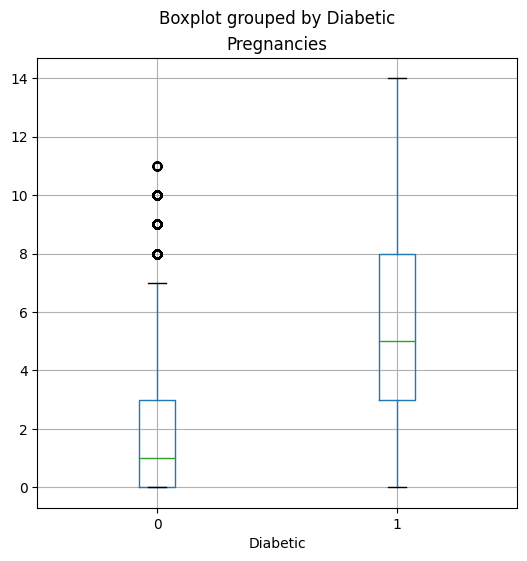

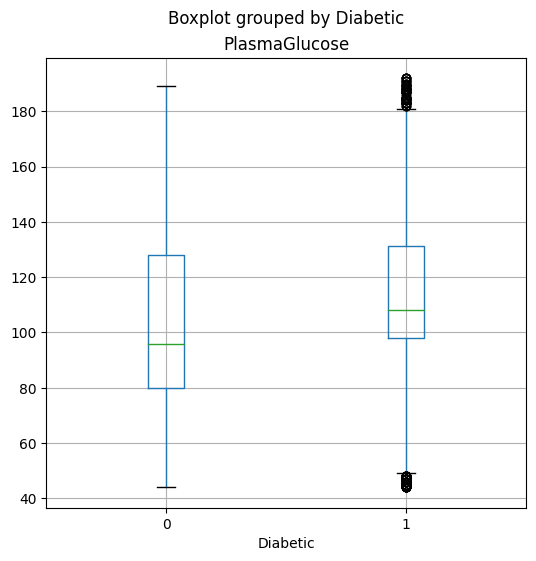

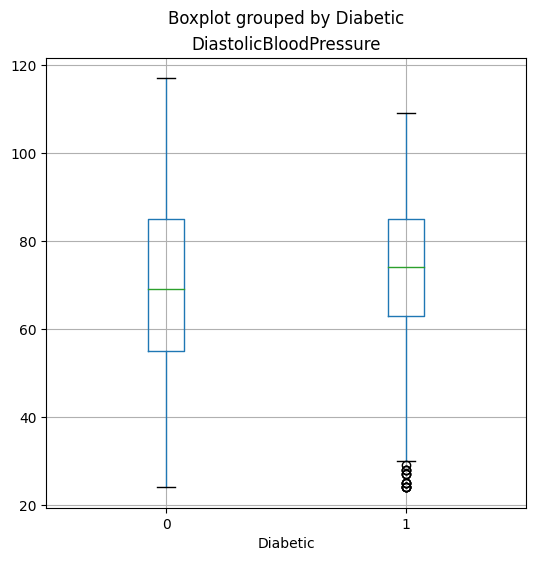

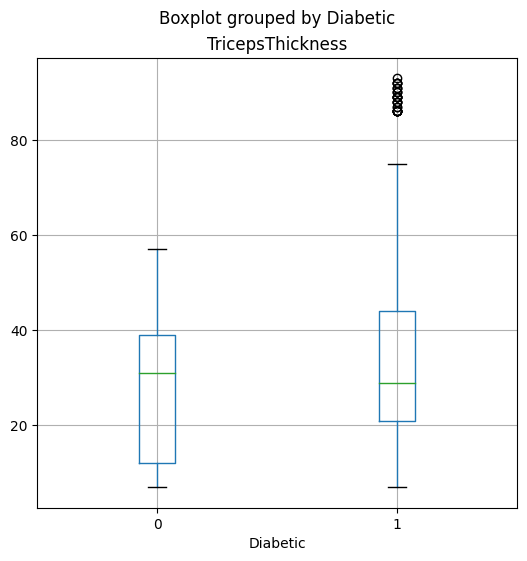

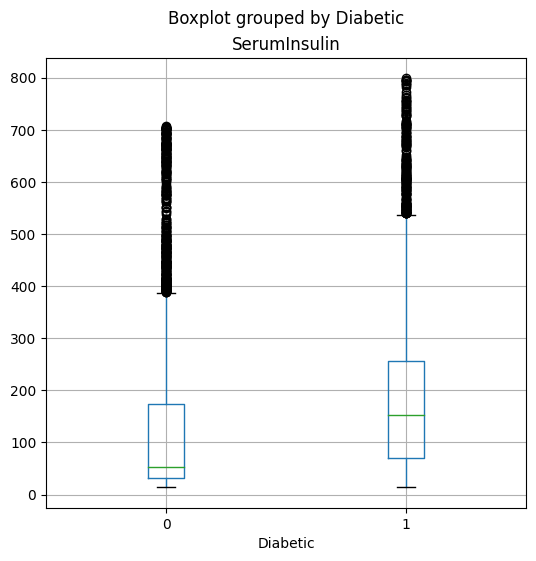

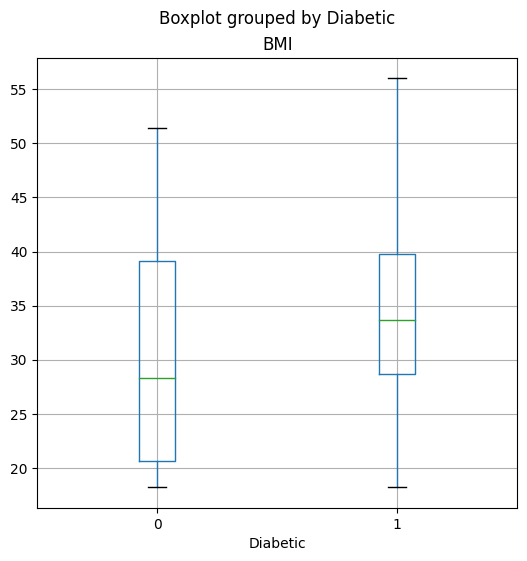

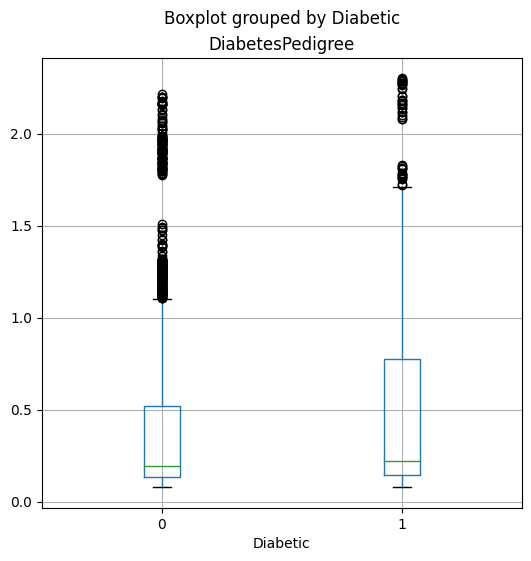

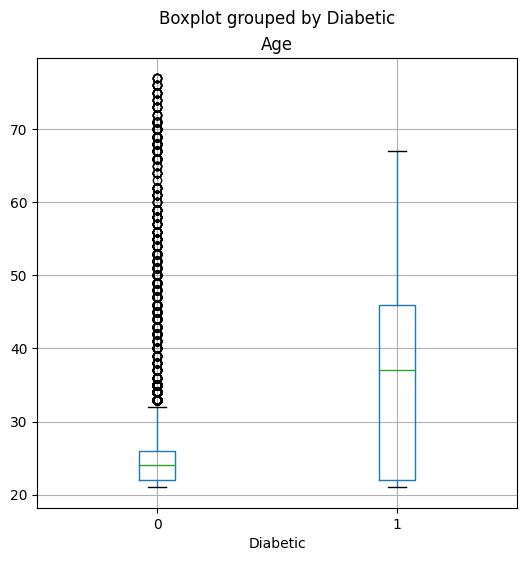

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
for col in features:
    diabetes.boxplot(column=col, by='Diabetic', figsize=(6,6))
    plt.title(col)
plt.show()

For some of the features, there's a noticeable difference in the distribution for each label value. In particular, **Pregnancies** and **Age** show markedly different distributions for diabetic patients than for non-diabetic patients. These features may help predict whether or not a patient is diabetic.

Para algunas de las características, hay una diferencia notable en la distribución de cada valor de etiqueta. En particular, **Pregnancies (Embarazos)** ​​y **Age (Edad)** muestran distribuciones marcadamente diferentes para pacientes diabéticos que para pacientes no diabéticos. Estas características pueden ayudar a predecir si un paciente es diabético o no.

### Split the data - Dividir los datos

Our dataset includes known values for the label, so we can use this to train a classifier so that it finds a statistical relationship between the features and the label value; but how will we know if our model is any good? How do we know it will predict correctly when we use it with new data that it wasn't trained with? Well, we can take advantage of the fact we have a large dataset with known label values, use only some of it to train the model, and hold back some to test the trained model - enabling us to compare the predicted labels with the already known labels in the test set.

Nuestro conjunto de datos incluye valores conocidos para la etiqueta, por lo que podemos usarlo para entrenar un clasificador para que encuentre una relación estadística entre las características y el valor de la etiqueta; pero ¿cómo sabremos si nuestro modelo es bueno? ¿Cómo sabemos que predecirá correctamente cuando lo usamos con nuevos datos con los que no fue entrenado? Bueno, podemos aprovechar el hecho de que tenemos un gran conjunto de datos con valores de etiqueta conocidos, usar solo una parte para entrenar el modelo y retener algunos para probar el modelo entrenado, lo que nos permite comparar las etiquetas pronosticadas con las ya conocidas. etiquetas en el conjunto de prueba.

In Python, the **scikit-learn** package contains a large number of functions we can use to build a machine learning model - including a **train_test_split** function that ensures we get a statistically random split of training and test data. We'll use that to split the data into 70% for training and hold back 30% for testing.

En Python, el paquete **scikit-learn** contiene una gran cantidad de funciones que podemos usar para crear un modelo de aprendizaje automático, incluida una función **train_test_split** que garantiza que obtengamos una división estadísticamente aleatoria de los datos de entrenamiento y prueba. Usaremos eso para dividir los datos en un *70 %* para el entrenamiento y retener un *30 %* para las pruebas.

In [7]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 10500
Test cases: 4500


### Train and Evaluate a Binary Classification Model - (Entrenar y evaluar un modelo de clasificación binaria)

OK, now we're ready to train our model by fitting the training features (**X_train**) to the training labels (**y_train**). There are various algorithms we can use to train the model. In this example, we'll use *Logistic Regression*, which (despite its name) is a well-established algorithm for classification. In addition to the training features and labels, we'll need to set a *regularization* parameter. This is used to counteract any bias in the sample, and help the model generalize well by avoiding *overfitting* the model to the training data.

Bien, ahora estamos listos para entrenar nuestro modelo ajustando las funciones de entrenamiento (**X_train**) a las etiquetas de entrenamiento (**y_train**). Hay varios algoritmos que podemos usar para entrenar el modelo. En este ejemplo, usaremos *Regresión logística*, que (a pesar de su nombre) es un algoritmo bien establecido para la clasificación. Además de las características y etiquetas de entrenamiento, necesitaremos establecer un parámetro de *regularización*. Esto se usa para contrarrestar cualquier sesgo en la muestra y ayudar a que el modelo se generalice bien evitando *overfitting (sobreajustar)* el modelo a los datos de entrenamiento.

> **Note**: Parameters for machine learning algorithms are generally referred to as *hyperparameters* (to a data scientist, *parameters* are values in the data itself - *hyperparameters* are defined externally from the data!)

> **Nota**: Los parámetros para los algoritmos de aprendizaje automático generalmente se conocen como *hiperparámetros* (para un científico de datos, los *parámetros* son valores en los propios datos - ¡los *hiperparámetros* se definen externamente a partir de los datos!)

In [8]:
# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

LogisticRegression(C=100.0, solver='liblinear')


Now we've trained the model using the training data, we can use the test data we held back to evaluate how well it predicts. Again, **scikit-learn** can help us do this. Let's start by using the model to predict labels for our test set, and compare the predicted labels to the known labels:

Ahora que hemos entrenado el modelo usando los datos de entrenamiento, podemos usar los datos de prueba que retuvimos para evaluar qué tan bien predice. Nuevamente, **scikit-learn** puede ayudarnos a hacer esto. Comencemos usando el modelo para predecir etiquetas para nuestro conjunto de prueba y comparemos las etiquetas pronosticadas con las etiquetas conocidas:

In [9]:
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

Predicted labels:  [0 0 0 ... 0 1 0]
Actual labels:     [0 0 1 ... 1 1 1]


The arrays of labels are too long to be displayed in the notebook output, so we can only compare a few values. Even if we printed out all of the predicted and actual labels, there are too many of them to make this a sensible way to evaluate the model. Fortunately, **scikit-learn** has a few more tricks up its sleeve, and it provides some metrics that we can use to evaluate the model.

Las matrices de etiquetas son demasiado largas para mostrarse en la salida del cuaderno, por lo que solo podemos comparar algunos valores. Incluso si imprimimos todas las etiquetas predichas y reales, hay demasiadas para que esta sea una forma sensata de evaluar el modelo. Afortunadamente, **scikit-learn** tiene algunos trucos más bajo la manga y proporciona algunas métricas que podemos usar para evaluar el modelo.

The most obvious thing you might want to do is to check the *accuracy* of the predictions - in simple terms, what proportion of the labels did the model predict correctly?

Lo más obvio que podría querer hacer es verificar la *accuracy(precisión)* de las predicciones; en términos simples, ¿qué proporción de las etiquetas predijo correctamente el modelo?

In [10]:
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.7888888888888889


The accuracy is returned as a decimal value - a value of 1.0 would mean that the model got 100% of the predictions right; while an accuracy of 0.0 is, well, pretty useless! 

La precisión se devuelve como un valor decimal: un valor de 1,0 significaría que el modelo acertó en el 100 % de las predicciones; mientras que una precisión de 0.0 es, bueno, ¡bastante inútil!


## Summary - Resumen

Here we prepared our data by splitting it into test and train datasets, and applied logistic regression - a way of applying binary labels to our data. Our model was able to predict whether patients had diabetes with what appears like reasonable accuracy. But is this good enough? In the next notebook we will look at alternatives to accuracy that can be much more useful in machine learning.

Aquí preparamos nuestros datos dividiéndolos en conjuntos de datos de prueba y entrenamiento, y aplicamos la regresión logística, una forma de aplicar etiquetas binarias a nuestros datos. Nuestro modelo fue capaz de predecir si los pacientes tenían diabetes con lo que parece ser una precisión razonable. ¿Pero es esto lo suficientemente bueno? En el próximo cuaderno, veremos alternativas a la precisión que pueden ser mucho más útiles en el aprendizaje automático.

In [11]:
from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500



The classification report includes the following metrics for each class  (0 and 1)

El informe de clasificación incluye las siguientes métricas para cada clase (0 y 1)

> note that the header row may not line up with the values!

> tenga en cuenta que es posible que la fila del encabezado no coincida con los valores.

* *Precision*: Of the predictions the model made for this class, what proportion were correct? - De las predicciones que hizo el modelo para esta clase, ¿qué proporción fueron correctas?.
* *Recall*: Out of all of the instances of this class in the test dataset, how many did the model identify? - De todas las instancias de esta clase en el conjunto de datos de prueba, ¿cuántas identificó el modelo?
* *F1-Score*: An average metric that takes both precision and recall into account. una métrica promedio que tiene en cuenta tanto la precisión como la recuperación.
* *Support*: How many instances of this class are there in the test dataset? ¿Cuántas instancias de esta clase hay en el conjunto de datos de prueba?

The classification report also includes averages for these metrics, including a weighted average that allows for the imbalance in the number of cases of each class.

El informe de clasificación también incluye promedios para estas métricas, incluido un promedio ponderado que permite el desequilibrio en la cantidad de casos de cada clase.

Because this is a *binary* classification problem, the ***1*** class is considered *positive* and its precision and recall are particularly interesting - these in effect answer the questions:

Debido a que este es un problema de clasificación *binario*, la clase ***1*** se considera *positiva* y su precisión y recuperación son particularmente interesantes; en efecto, responden las preguntas:

- Of all the patients the model predicted are diabetic, how many are actually diabetic?
- De todos los pacientes que el modelo predijo que son diabéticos, ¿cuántos son realmente diabéticos?
- Of all the patients that are actually diabetic, how many did the model identify?
- De todos los pacientes que en realidad son diabéticos, ¿cuántos identificó el modelo?

You can retrieve these values on their own by using the **precision_score** and **recall_score** metrics in scikit-learn (which by default assume a binary classification model).

Puede recuperar estos valores por sí solos usando las métricas **precision_score** y **recall_score** en scikit-learn (que por defecto asumen un modelo de clasificación binaria).

In [12]:
from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

Overall Precision: 0.7231012658227848
Overall Recall: 0.6036988110964333


The precision and recall metrics are derived from four possible prediction outcomes:

Las métricas de precisión y recuperación se derivan de cuatro posibles resultados de predicción:

* *True Positives*: The predicted label and the actual label are both 1.
* *False Positives*: The predicted label is 1, but the actual label is 0.
* *False Negatives*: The predicted label is 0, but the actual label is 1.
* *True Negatives*: The predicted label and the actual label are both 0.

These metrics are generally tabulated for the test set and shown together as a *confusion matrix*, which takes the following form:

Estas métricas generalmente se tabulan para el conjunto de prueba y se muestran juntas como una *matriz de confusión*, que toma la siguiente forma:

<table style="border: 1px solid black;">
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;color: black;" bgcolor="lightgray">TN</td><td style="border: 1px solid black;color: black;" bgcolor="white">FP</td>
    </tr>
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;color: black;" bgcolor="white">FN</td><td style="border: 1px solid black;color: black;" bgcolor="lightgray">TP</td>
    </tr>
</table>

Note that the correct (*true*) predictions form a diagonal line from top left to bottom right - these figures should be significantly higher than the *false* predictions if the model is any good.

Tenga en cuenta que las predicciones correctas (*true*) forman una línea diagonal desde la parte superior izquierda hasta la parte inferior derecha; estas cifras deberían ser significativamente más altas que las predicciones *falsas* si el modelo es bueno.

In Python, you can use the **sklearn.metrics.confusion_matrix** function to find these values for a trained classifier:

En Python, puede usar la función **sklearn.metrics.confusion_matrix** para encontrar estos valores para un clasificador entrenado:

In [13]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print (cm)

[[2636  350]
 [ 600  914]]


Until now, we've considered the predictions from the model as being either 1 or 0 class labels. Actually, things are a little more complex than that. Statistical machine learning algorithms, like logistic regression, are based on *probability*; so what actually gets predicted by a binary classifier is the probability that the label is true (**P(y)**) and the probability that the label is false (1 - **P(y)**). A threshold value of 0.5 is used to decide whether the predicted label is a 1 (*P(y) > 0.5*) or a 0 (*P(y) <= 0.5*). You can use the **predict_proba** method to see the probability pairs for each case:

Hasta ahora, hemos considerado las predicciones del modelo como etiquetas de clase 1 o 0. En realidad, las cosas son un poco más complejas que eso. Los algoritmos de aprendizaje automático estadístico, como la regresión logística, se basan en *probabilidad*; entonces, lo que realmente predice un clasificador binario es la probabilidad de que la etiqueta sea verdadera (**P(y)**) y la probabilidad de que la etiqueta sea falsa (1 - **P(y)**). Se utiliza un valor de umbral de 0,5 para decidir si la etiqueta predicha es un 1 (*P(y) > 0,5*) o un 0 (*P(y) <= 0,5*). Puedes usar el método **predict_proba** para ver los pares de probabilidad para cada caso:

In [14]:
y_scores = model.predict_proba(X_test)
print(y_scores)

[[0.8167346  0.1832654 ]
 [0.96317962 0.03682038]
 [0.80900866 0.19099134]
 ...
 [0.60687902 0.39312098]
 [0.10608226 0.89391774]
 [0.63833991 0.36166009]]


The decision to score a prediction as a 1 or a 0 depends on the threshold to which the predicted probabilities are compared. If we were to change the threshold, it would affect the predictions; and therefore change the metrics in the confusion matrix. A common way to evaluate a classifier is to examine the *true positive rate* (which is another name for recall) and the *false positive rate* for a range of possible thresholds. These rates are then plotted against all possible thresholds to form a chart known as a *received operator characteristic (ROC) chart*, like this:

La decisión de puntuar una predicción como 1 o 0 depende del umbral con el que se comparan las probabilidades pronosticadas. Si tuviéramos que cambiar el umbral, afectaría las predicciones; y por lo tanto cambiar las métricas en la matriz de confusión. Una forma común de evaluar un clasificador es examinar la *tasa de verdaderos positivos* (que es otro nombre para recordar) y la *tasa de falsos positivos* para un rango de umbrales posibles. Luego, estas tasas se trazan contra todos los umbrales posibles para formar un gráfico conocido como *gráfico de características del operador recibido (ROC)*, como este:

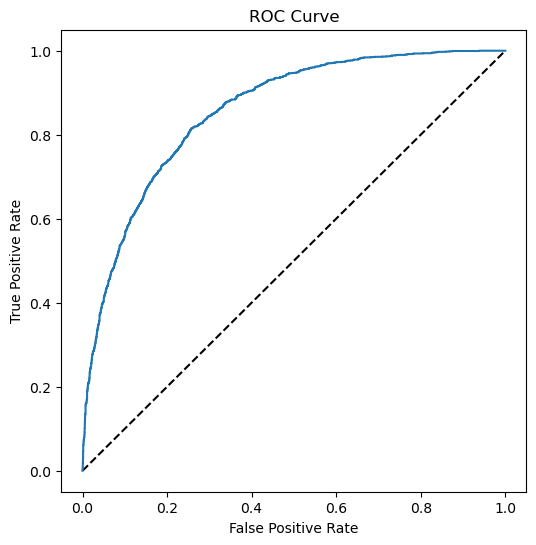

In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The ROC chart shows the curve of the true and false positive rates for different threshold values between 0 and 1. A perfect classifier would have a curve that goes straight up the left side and straight across the top. The diagonal line across the chart represents the probability of predicting correctly with a 50/50 random prediction; so you obviously want the curve to be higher than that (or your model is no better than simply guessing!).

El gráfico ROC muestra la curva de las tasas de verdaderos y falsos positivos para diferentes valores de umbral entre 0 y 1. Un clasificador perfecto tendría una curva que sube directamente por el lado izquierdo y cruza directamente la parte superior. La línea diagonal que atraviesa el gráfico representa la probabilidad de predecir correctamente con una predicción aleatoria 50/50; por lo que obviamente desea que la curva sea más alta que eso (¡o su modelo no es mejor que simplemente adivinar!).


The area under the curve (AUC) is a value between 0 and 1 that quantifies the overall performance of the model. The closer to 1 this value is, the better the model. Once again, scikit-Learn includes a function to calculate this metric.

El área bajo la curva (AUC) es un valor entre 0 y 1 que cuantifica el rendimiento general del modelo. Cuanto más cerca de 1 sea este valor, mejor será el modelo. Una vez más, scikit-Learn incluye una función para calcular esta métrica.

In [16]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.8568301125198085


### Perform preprocessing in a pipeline ( Realizar pre-procesamiento en una canalizacion)

In this case, the ROC curve and its AUC indicate that the model performs better than a random guess which is not bad considering we performed very little preprocessing of the data.

En este caso, la curva ROC y su AUC indican que el modelo funciona mejor que una suposición aleatoria, lo cual no está mal considerando que realizamos muy poco preprocesamiento de los datos.

In practice, it's common to perform some preprocessing of the data to make it easier for the algorithm to fit a model to it. There's a huge range of preprocessing transformations you can perform to get your data ready for modeling, but we'll limit ourselves to a few common techniques:

En la práctica, es común realizar algún preprocesamiento de los datos para que sea más fácil para el algoritmo ajustar un modelo a ellos. Hay una gran variedad de transformaciones de preprocesamiento que puede realizar para preparar sus datos para el modelado, pero nos limitaremos a algunas técnicas comunes:


- Scaling numeric features so they're on the same scale. This prevents features with large values from producing coefficients that disproportionately affect the predictions.

- Escalar características numéricas para que estén en la misma escala. Esto evita que las características con valores grandes produzcan coeficientes que afecten de manera desproporcionada a las predicciones.

- Encoding categorical variables. For example, by using a *one hot encoding* technique you can create individual binary (true/false) features for each possible category value.

- Codificación de variables categóricas. Por ejemplo, mediante el uso de una técnica *one hot encoding* *una codificación en caliente* puede crear características binarias individuales (verdadero/falso) para cada valor de categoría posible.

To apply these preprocessing transformations, we'll make use of a Scikit-Learn feature named *pipelines*. These enable us to define a set of preprocessing steps that end with an algorithm. You can then fit the entire pipeline to the data, so that the model encapsulates all of the preprocessing steps as well as the regression algorithm. This is useful, because when we want to use the model to predict values from new data, we need to apply the same transformations (based on the same statistical distributions and category encodings used with the training data).

Para aplicar estas transformaciones de preprocesamiento, utilizaremos una característica de Scikit-Learn denominada *tuberías*. Estos nos permiten definir un conjunto de pasos de preprocesamiento que terminan con un algoritmo. A continuación, puede ajustar toda la canalización a los datos, de modo que el modelo encapsule todos los pasos de preprocesamiento, así como el algoritmo de regresión. Esto es útil, porque cuando queremos usar el modelo para predecir valores a partir de nuevos datos, necesitamos aplicar las mismas transformaciones (basadas en las mismas distribuciones estadísticas y codificaciones de categorías que se usan con los datos de entrenamiento).

>**Note**: The term *pipeline* is used extensively in machine learning, often to mean very different things! In this context, we're using it to refer to pipeline objects in Scikit-Learn, but you may see it used elsewhere to mean something else.

>**Nota**: El término *pipeline (canalización* se usa ampliamente en el aprendizaje automático, ¡a menudo con significados muy diferentes! En este contexto, lo usamos para referirnos a objetos de canalización en Scikit-Learn, pero es posible que vea que se usa en otros lugares para significar otra cosa.

In [18]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define preprocessing for numeric columns (normalize them so they're on the same scale)
numeric_features = [0,1,2,3,4,5,6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode the Age column)
categorical_features = [7]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', LogisticRegression(C=1/reg, solver="liblinear"))])


# fit the pipeline to train a logistic regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])


The pipeline encapsulates the preprocessing steps as well as model training.

La canalización encapsula los pasos de preprocesamiento, así como el entrenamiento del modelo.

Let's use the model trained by this pipeline to predict labels for our test set, and compare the performance metrics with the basic model we created previously.

Usemos el modelo entrenado por esta canalización para predecir etiquetas para nuestro conjunto de prueba y comparemos las métricas de rendimiento con el modelo básico que creamos anteriormente.

Confusion Matrix:
 [[2667  319]
 [ 406 1108]] 

Accuracy: 0.8388888888888889
Overall Precision: 0.7764540995094604
Overall Recall: 0.7318361955085865
AUC: 0.9202442751333613


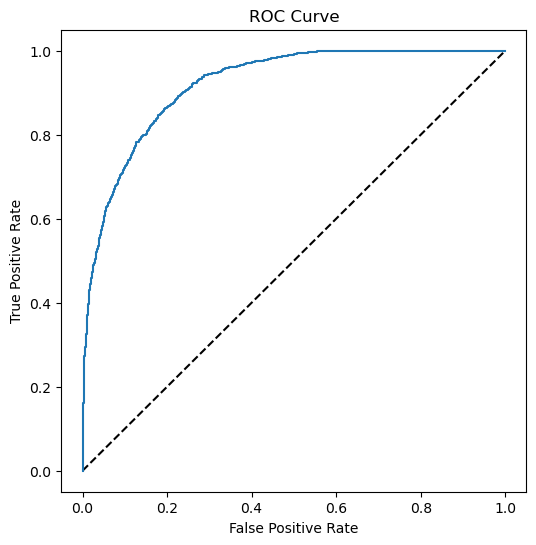

In [20]:
# Get predictions from test data
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()



The results look a little better, so clearly preprocessing the data has made a difference.

Los resultados se ven un poco mejores, por lo que claramente el preprocesamiento de los datos ha marcado la diferencia.

### Try a different algorithm - Pruebe con un Algoritmo diferente.

Now let's try a different algorithm. Previously we used a logistic regression algorithm, which is a *linear* algorithm. There are many kinds of classification algorithm we could try, including:

Ahora probemos con un algoritmo diferente. Anteriormente usamos un algoritmo de regresión logística, que es un algoritmo *lineal*. Hay muchos tipos de algoritmos de clasificación que podríamos probar, entre ellos:

- **Support Vector Machine algorithms**: Algorithms that define a *hyperplane* that separates classes.
- **Tree-based algorithms**: Algorithms that build a decision tree to reach a prediction
- **Ensemble algorithms**: Algorithms that combine the outputs of multiple base algorithms to improve generalizability.

This time, We'll use the same preprocessing steps as before, but we'll train the model using an *ensemble* algorithm named *Random Forest* that combines the outputs of multiple random decision trees (for more details, see the [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees)).

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', RandomForestClassifier(n_estimators=100))])

# fit the pipeline to train a random forest model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor', RandomForestClassifier())])


Let's look at the performance metrics for the new model.

Confusion Matrix:
 [[2857  129]
 [ 184 1330]] 

Accuracy: 0.9304444444444444
Overall Precision: 0.9115832762165867
Overall Recall: 0.8784676354029062

AUC: 0.9819315325327087


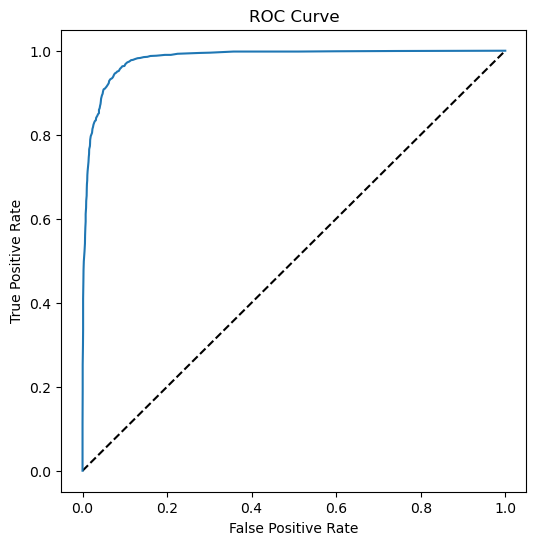

In [22]:
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

That looks better! - ¡Eso se ve mejor!

### Use the Model for Inferencing - Usar el modelo para hacer inferencias
Now that we have a reasonably useful trained model, we can save it for use later to predict labels for new data:

Ahora que tenemos un modelo entrenado razonablemente útil, podemos guardarlo para usarlo más tarde para predecir etiquetas para nuevos datos:

In [23]:
import joblib

# Save the model as a pickle file
filename = './diabetes_model.pkl'
joblib.dump(model, filename)

['./diabetes_model.pkl']

When we have some new observations for which the label is unknown, we can load the model and use it to predict values for the unknown label:

Cuando tenemos algunas observaciones nuevas para las que se desconoce la etiqueta, podemos cargar el modelo y usarlo para predecir valores para la etiqueta desconocida:

In [25]:
# Load the model from the file
model = joblib.load(filename)

# predict on a new sample
# The model accepts an array of feature arrays (so you can predict the classes of multiple patients in a single call)
# We'll create an array with a single array of features, representing one patient
X_new = np.array([[2,180,74,24,21,23.9091702,1.488172308,22]])
print ('New sample: {}'.format(list(X_new[0])))

# Get a prediction
pred = model.predict(X_new)

# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one patient, so our prediction is the first one in the resulting array.
print('Predicted class is {}'.format(pred[0]))

New sample: [2.0, 180.0, 74.0, 24.0, 21.0, 23.9091702, 1.488172308, 22.0]
Predicted class is 1


## Summary - Resumen

In this notebook, we looked at the basics of binary classification. We will move onto more complex classification problems in the following notebook.

En este cuaderno, analizamos los conceptos básicos de la clasificación binaria. Pasaremos a problemas de clasificación más complejos en el siguiente cuaderno.